# Import the necessary libraries

In [1]:
import bs4 as bs
import urllib.request
import re
import heapq

from nltk import sent_tokenize, word_tokenize
from nltk.corpus import stopwords

import matplotlib.pyplot as plt

# Loading the data from wikipedia

In [2]:
source = urllib.request.urlopen('https://simple.wikipedia.org/wiki/Global_warming').read()
soup = bs.BeautifulSoup(source, 'html.parser')

In [3]:
print(soup)

<!DOCTYPE html>

<html class="client-nojs" dir="ltr" lang="en">
<head>
<meta charset="utf-8"/>
<title>Global warming - Simple English Wikipedia, the free encyclopedia</title>
<script>document.documentElement.className="client-js";RLCONF={"wgBreakFrames":false,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"fdccfcf4-4d24-41b0-ac39-6a72e21d6660","wgCSPNonce":false,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":false,"wgNamespaceNumber":0,"wgPageName":"Global_warming","wgTitle":"Global warming","wgCurRevisionId":8113350,"wgRevisionId":8113350,"wgArticleId":7368,"wgIsArticle":true,"wgIsRedirect":false,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["CS1 maint: url-status","Webarchive template wayback links","Energy","Climate change","Air pollution"],"wgPageContentLang

# Fetching the paragraph tag

In [4]:
text = ""
for paragraph in soup.find_all('p'):
    text += paragraph.text

print(text)

Global warming is the current rise in temperature of the air and oceans. It happens because humans burn coal, oil and natural gas, and cut down forests.[1] Average temperatures today are about 1 °C (1.8 °F) higher than before people started burning a lot of coal around 1750.[2] In some parts of the world it is less and some more. Most climate scientists say that by the year 2100 temperatures will be 2 °C (3.6 °F) to  4 °C (7.2 °F) higher than they were before 1750.[3] The extra warmth melts ice caps around the world. Sea level is rising for two reasons: ice on the land, like Greenland, melts into the sea. Water also gets larger when it warms. Many cities will be partly flooded by the ocean in the 21st century.
Global warming is mostly because of people burning things, like gasoline for cars and natural gas to keep houses warm. But the heat from the burning itself only makes the world a tiny bit warmer: it is the carbon dioxide from the burning which is the biggest part of the problem. 

# Function to clean the text

In [5]:
def cleaning(text):
    text = re.sub(r'\[[0-9]*\]', ' ', text)
    text = re.sub(r'\s+', ' ', text)
    
    clean_text = text.lower()
    clean_text = re.sub(r'\W', ' ', clean_text)
    clean_text = re.sub(r'\d', ' ', clean_text)
    clean_text = re.sub(r'\s+',' ', clean_text)
    
    return text, clean_text

In [6]:
text, clean_text = cleaning(text)

In [7]:
print(text)

Global warming is the current rise in temperature of the air and oceans. It happens because humans burn coal, oil and natural gas, and cut down forests. Average temperatures today are about 1 °C (1.8 °F) higher than before people started burning a lot of coal around 1750. In some parts of the world it is less and some more. Most climate scientists say that by the year 2100 temperatures will be 2 °C (3.6 °F) to 4 °C (7.2 °F) higher than they were before 1750. The extra warmth melts ice caps around the world. Sea level is rising for two reasons: ice on the land, like Greenland, melts into the sea. Water also gets larger when it warms. Many cities will be partly flooded by the ocean in the 21st century. Global warming is mostly because of people burning things, like gasoline for cars and natural gas to keep houses warm. But the heat from the burning itself only makes the world a tiny bit warmer: it is the carbon dioxide from the burning which is the biggest part of the problem. Among the 

In [8]:
print(clean_text)

global warming is the current rise in temperature of the air and oceans it happens because humans burn coal oil and natural gas and cut down forests average temperatures today are about c f higher than before people started burning a lot of coal around in some parts of the world it is less and some more most climate scientists say that by the year temperatures will be c f to c f higher than they were before the extra warmth melts ice caps around the world sea level is rising for two reasons ice on the land like greenland melts into the sea water also gets larger when it warms many cities will be partly flooded by the ocean in the st century global warming is mostly because of people burning things like gasoline for cars and natural gas to keep houses warm but the heat from the burning itself only makes the world a tiny bit warmer it is the carbon dioxide from the burning which is the biggest part of the problem among the greenhouse gases the increase of carbon dioxide in the atmosphere

# Sentence tokenization

In [9]:
sentences = sent_tokenize(text)
print(sentences)

['Global warming is the current rise in temperature of the air and oceans.', 'It happens because humans burn coal, oil and natural gas, and cut down forests.', 'Average temperatures today are about 1 °C (1.8 °F) higher than before people started burning a lot of coal around 1750.', 'In some parts of the world it is less and some more.', 'Most climate scientists say that by the year 2100 temperatures will be 2 °C (3.6 °F) to 4 °C (7.2 °F) higher than they were before 1750.', 'The extra warmth melts ice caps around the world.', 'Sea level is rising for two reasons: ice on the land, like Greenland, melts into the sea.', 'Water also gets larger when it warms.', 'Many cities will be partly flooded by the ocean in the 21st century.', 'Global warming is mostly because of people burning things, like gasoline for cars and natural gas to keep houses warm.', 'But the heat from the burning itself only makes the world a tiny bit warmer: it is the carbon dioxide from the burning which is the biggest

# Counting the number of words

In [10]:
word2count = {}
for word in word_tokenize(clean_text):
    if word not in stopwords.words('english'):
        if word not in word2count.keys():
            word2count[word] = 1
        else:
            word2count[word] += 1

In [11]:
print(word2count)

{'global': 7, 'warming': 8, 'current': 2, 'rise': 6, 'temperature': 17, 'air': 8, 'oceans': 2, 'happens': 1, 'humans': 2, 'burn': 8, 'coal': 7, 'oil': 5, 'natural': 5, 'gas': 9, 'cut': 3, 'forests': 1, 'average': 3, 'temperatures': 5, 'today': 1, 'c': 8, 'f': 7, 'higher': 2, 'people': 18, 'started': 4, 'burning': 9, 'lot': 3, 'around': 4, 'parts': 1, 'world': 4, 'less': 8, 'climate': 7, 'scientists': 6, 'say': 1, 'year': 2, 'extra': 1, 'warmth': 1, 'melts': 2, 'ice': 9, 'caps': 2, 'sea': 9, 'level': 7, 'rising': 3, 'two': 1, 'reasons': 1, 'land': 2, 'like': 7, 'greenland': 2, 'water': 5, 'also': 11, 'gets': 5, 'larger': 1, 'warms': 1, 'many': 5, 'cities': 5, 'partly': 3, 'flooded': 1, 'ocean': 1, 'st': 1, 'century': 4, 'mostly': 4, 'things': 3, 'gasoline': 1, 'cars': 2, 'keep': 3, 'houses': 1, 'warm': 8, 'heat': 2, 'makes': 1, 'tiny': 1, 'bit': 2, 'warmer': 6, 'carbon': 15, 'dioxide': 13, 'biggest': 1, 'part': 1, 'problem': 1, 'among': 1, 'greenhouse': 11, 'gases': 7, 'increase': 4, 'a

# Bar graph for each of the word

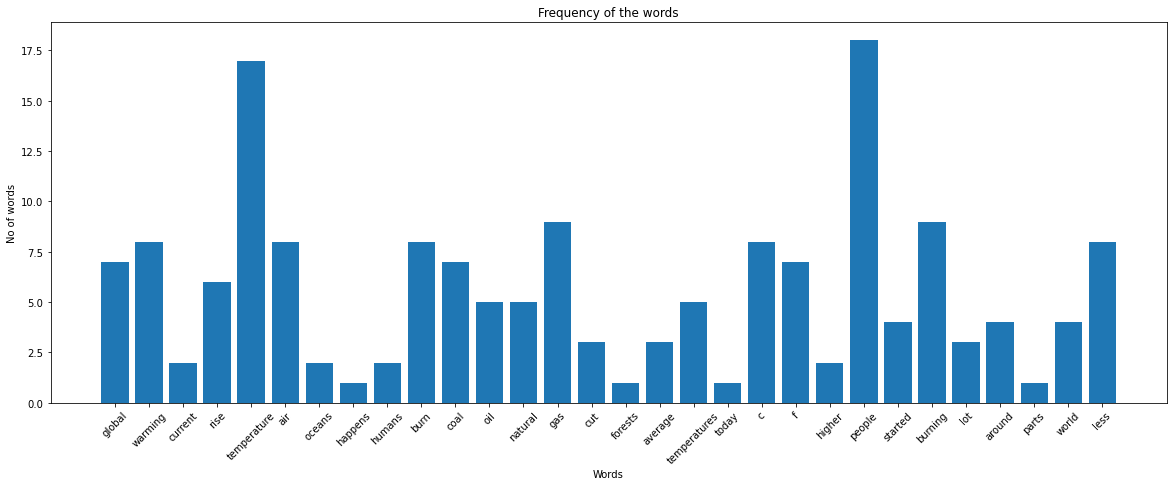

In [12]:
plt.figure(figsize=(20,7))
plt.bar(list(word2count.keys())[:30], list(word2count.values())[:30])
plt.title('Frequency of the words')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.ylabel('No of words')
plt.show()

# Normalize the data

In [13]:
for key in word2count.keys():
    word2count[key] = word2count[key]/max(word2count.values())

In [14]:
print(word2count)

{'global': 0.3888888888888889, 'warming': 0.4444444444444444, 'current': 0.1111111111111111, 'rise': 0.3333333333333333, 'temperature': 0.9444444444444444, 'air': 0.4444444444444444, 'oceans': 0.1111111111111111, 'happens': 0.05555555555555555, 'humans': 0.1111111111111111, 'burn': 0.4444444444444444, 'coal': 0.3888888888888889, 'oil': 0.2777777777777778, 'natural': 0.2777777777777778, 'gas': 0.5, 'cut': 0.16666666666666666, 'forests': 0.05555555555555555, 'average': 0.16666666666666666, 'temperatures': 0.2777777777777778, 'today': 0.05555555555555555, 'c': 0.4444444444444444, 'f': 0.3888888888888889, 'higher': 0.1111111111111111, 'people': 1.0, 'started': 0.26666666666666666, 'burning': 0.6, 'lot': 0.2, 'around': 0.26666666666666666, 'parts': 0.06666666666666667, 'world': 0.26666666666666666, 'less': 0.5333333333333333, 'climate': 0.4666666666666667, 'scientists': 0.4, 'say': 0.06666666666666667, 'year': 0.13333333333333333, 'extra': 0.06666666666666667, 'warmth': 0.06666666666666667,

# Plot after normalizsation of the data

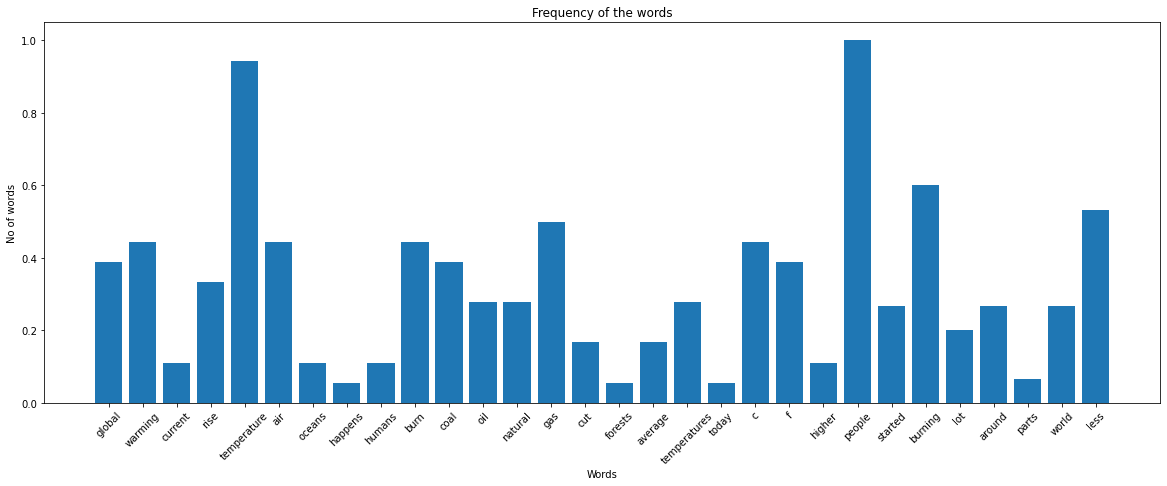

In [15]:
plt.figure(figsize=(20,7))
plt.bar(list(word2count.keys())[:30], list(word2count.values())[:30])
plt.title('Frequency of the words')
plt.xlabel('Words')
plt.xticks(rotation=45)
plt.ylabel('No of words')
plt.show()

# Scoring sentences on the basis of word score for each word present in it

In [16]:
sent2score = {}
for sentence in sentences:
    for word in word_tokenize(sentence.lower()):
        if word in word2count.keys():
            if len(sentence.split(' ')) < 25:
                if sentence not in sent2score.keys():
                    sent2score[sentence] = word2count[word]
                else:
                    sent2score[sentence] += word2count[word]

In [17]:
print(sent2score)

{'Global warming is the current rise in temperature of the air and oceans.': 2.777777777777778, 'It happens because humans burn coal, oil and natural gas, and cut down forests.': 2.2777777777777772, 'Average temperatures today are about 1 °C (1.8 °F) higher than before people started burning a lot of coal around 1750.': 3.3333333333333335, 'In some parts of the world it is less and some more.': 0.8666666666666667, 'The extra warmth melts ice caps around the world.': 1.5333333333333332, 'Sea level is rising for two reasons: ice on the land, like Greenland, melts into the sea.': 3.466666666666667, 'Water also gets larger when it warms.': 1.5333333333333332, 'Many cities will be partly flooded by the ocean in the 21st century.': 1.2666666666666666, 'Global warming is mostly because of people burning things, like gasoline for cars and natural gas to keep houses warm.': 5.144444444444445, 'When people burn fossil fuels like coal, oil and natural gas this adds carbon dioxide into the air.': 

# Fetching the top 5 sentences

In [18]:
best_sentences = heapq.nlargest(5, sent2score, key=sent2score.get)

# Creating summary from best sentences

In [19]:
'. '.join(best_sentences)

"People can also use energy sources that don't burn fossil fuel, like solar panels or electricity from nuclear power or wind power.. When people burn fossil fuels like coal, oil and natural gas this adds carbon dioxide into the air.. Soon after, scientists studying all different kinds of science began to work together to figure out the mystery of GHG emissions and their effects.. An ice core, captured through drilling, provided clear evidence that carbon dioxide levels have risen.. Many cities are sea ports and under threat of flooding if the present sea level rises."